**NAME:** SSEMUJJU EDIRISA <br>
**IDNO:** 151-371 <br>
**COURSE:** BCS <br>
**SUPERVISOR** Mr. KUMAKECH MICHAEL

<center><h1>SECTION A</h1></center>

#### QUESTION ONE

In [1]:
import pandas as pd

In [2]:
acc = pd.read_csv("Risk_factors.csv")
acc.head()

,Year,Fatal,Serious,Minor,Risk_Factor,Total_Crashes
0,2020,1081,2611,1666,Population Behaviour,5358
1,2019,835,2587,1740,Population Behaviour,5162
2,2018,830,2698,2013,Population Behaviour,5541
3,2017,720,2951,2027,Population Behaviour,5698
4,2016,710,3245,2612,Population Behaviour,6567


In [3]:
columns = ['Year', 'Fatal', 'Serious', 'Minor', 'Total_Crashes']
corr_matrix = acc[columns].corr()
corr_matrix

,Year,Fatal,Serious,Minor,Total_Crashes
Year,1.000000,0.034838,-0.068995,-0.132813,-0.078157
Fatal,0.034838,1.000000,0.836772,0.598245,0.832189
Serious,-0.068995,0.836772,1.000000,0.874706,0.986480
Minor,-0.132813,0.598245,0.874706,1.000000,0.928297
Total_Crashes,-0.078157,0.832189,0.986480,0.928297,1.000000


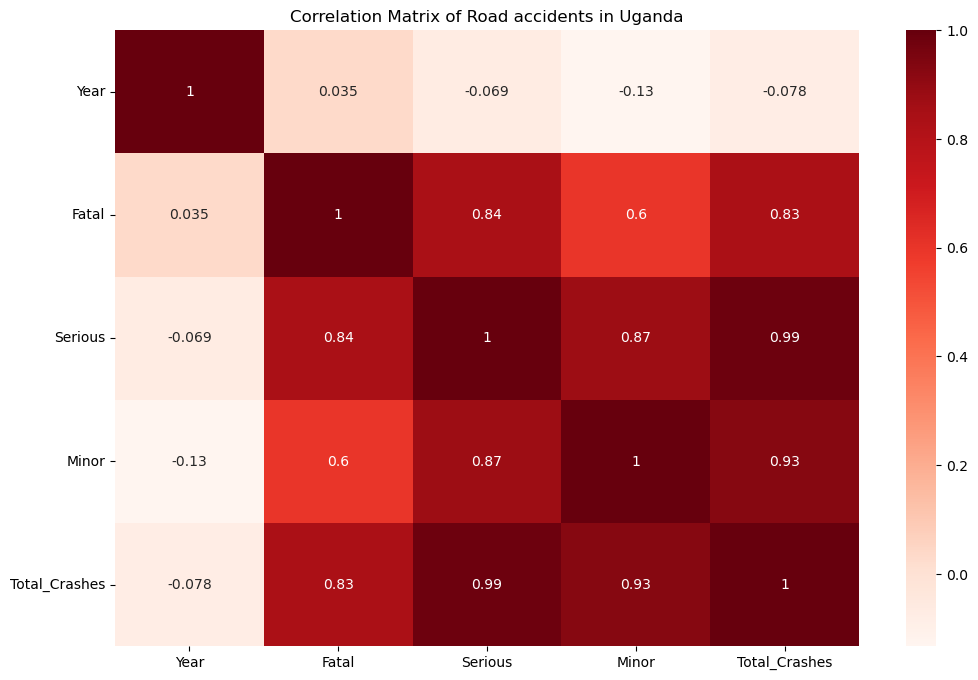

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.xticks(ha='center')
plt.yticks(rotation=0, va='center')  
plt.title("Correlation Matrix of Road accidents in Uganda")
plt.show()

#### Simple Linear regression between serious and total crashes.

In [5]:
X = acc[['Serious']]
y = acc[['Total_Crashes']]

#### Linear Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Making a prediction

In [82]:
y_pred = model.predict(X_test)

#### Visualization

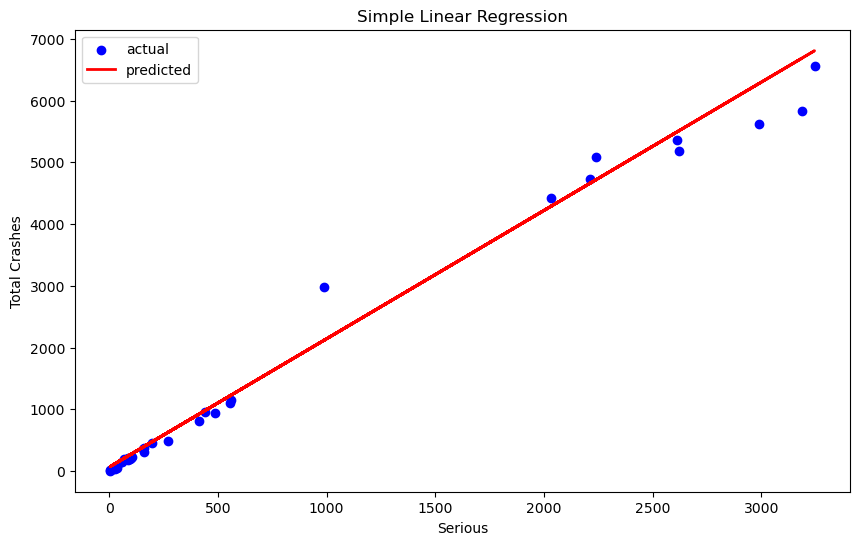

In [83]:
plt.figure(figsize=(10,6))
#Scatter plot of the data
plt.scatter(X_test, y_test, color = "blue", label ="actual")
#Regression line
plt.plot(X_test, y_pred, color ='r', linewidth = 2, label ='predicted')
plt.title("Simple Linear Regression")
plt.xlabel("Serious")
plt.ylabel("Total Crashes")
plt.legend()
plt.show()

#### Intercept

In [84]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: [64.16080764]


#### Coefficient

In [85]:
coef = model.coef_
print("Coefficient:", coef)

Coefficient: [[2.07829196]]


#### Simple linear regression model

Y= MX + C where y is the number of Total Crashes, M is the coefficient, X is the number of serious accidents and C is the intercept

In [86]:
Regression_model = f"Total_Crashes = {coef}Serious + {intercept}" #Following y = mx + C where m is coefficient and C is intercept
print(Regression_model)

Total_Crashes = [[2.07829196]]Serious + [64.16080764]


#### R-Squared and Mean Squared error

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R - Squared: ",r2)

Mean Squared Error:  61619.392561294124
R - Squared:  0.9858589778548748


### QUESTION TWO

#### Multiple Linear regression

In [13]:
# Independent variables excluding the dependent and the varibale with a weak relationship
P = acc.drop(columns=["Year", "Total_Crashes","Risk_Factor"],axis = 1).values  
# Dependent variable
Q = acc['Total_Crashes'].values 

In [70]:
from sklearn.model_selection import train_test_split
P_train, P_test, Q_train, Q_test = train_test_split(P,Q, test_size = 0.2, random_state = 3)

In [71]:
multmodel = LinearRegression()
multmodel.fit(P_train, Q_train)

LinearRegression()

#### Visualization

In [72]:
predicted_values = multmodel.predict(P_test)

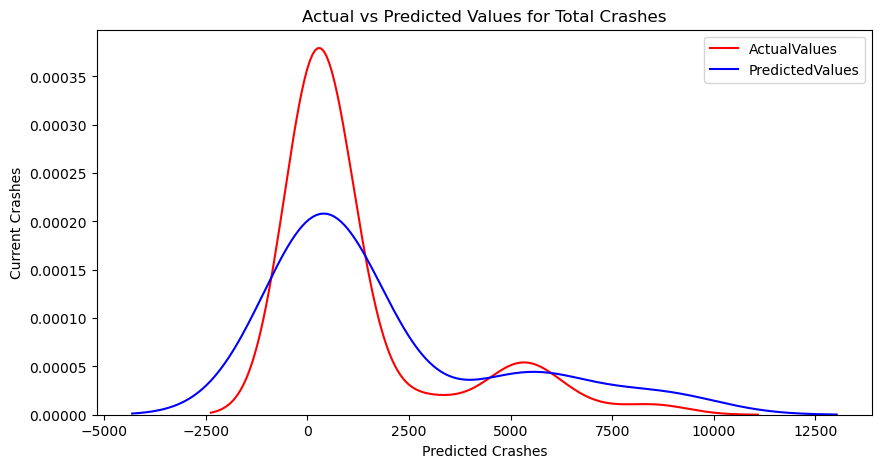

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

ax1 = sns.kdeplot(acc['Total_Crashes'], color='red', label ='ActualValues') #Actual values
sns.kdeplot(predicted_values, color="b", label ='PredictedValues', ax=ax1) # predicted value

plt.title('Actual vs Predicted Values for Total Crashes')
plt.xlabel('Predicted Crashes')
plt.ylabel("Current Crashes")
plt.legend(loc = "lower right")
plt.legend()
plt.show()

The above graph is constant indicating that there is over fiting

#### Intercept

In [74]:
intercept = multmodel.intercept_
print("Intercept:", intercept)

Intercept: -2.2737367544323206e-13


#### Coefficient

In [75]:
Coefficient = multmodel.coef_
print("Coefficients:",Coefficient)

Coefficients: [1. 1. 1.]


#### Multiple linear regression model mathematically
Y = a + b1X1 + b2X2 + b3X3 +.....+ bnXn
where 
Y is Total Crashes
a is the intercept
b1, b2, b3, bn are coefficients
X1, X2, X3, Xn are independent variables such as Serious, Fatal and Minor
Therefore
Total Crashes = -4.5475 + (1)Serious + (1)Fatal + (1)Minor

#### Evaluating R-Squared and Mean squared Error

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Q_test, predicted_values)
r2 = r2_score(Q_test, predicted_values)

print("Mean Squared Error: ", mse)
print("R - Squared: ",r2)

Mean Squared Error:  1.5465149584843452e-24
R - Squared:  1.0
